In [ ]:

# we will use T4 GPU for better computation

! nvidia-smi            # to see the specification of the gpu

Tue Jan 16 03:00:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# diable the warnings
import warnings
warnings.filterwarnings('ignore')

# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing deeplearning frameworks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [ ]:
# Importing the data

# link to download data - https://drive.google.com/drive/folders/1FCC87PaA2eX6mWD5IIT4FEUAsO1z4YZf?usp=sharing

# Training Data
X_train = np.loadtxt('/content/drive/MyDrive/Datasets/Input/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/Datasets/Input/labels.csv', delimiter=',')

# Testing data
X_test = np.loadtxt('/content/drive/MyDrive/Datasets/Input/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/Datasets/Input/labels_test.csv', delimiter=',')

In [ ]:
# Checking the dimension of the images
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [ ]:
# pixel values of first image
print('Pixel values of first training image:',X_train[0, :])

# min and max pixel value of the image
print('Min pixel value:', min(X_train[0, :]))
print('Max pixel value:', max(X_train[0, :]))

# NOTE
    # If the pixel value is between 0 and 1 it is a grey scale image
    # If the pixel value is between 0 and 255 it is a color image

Pixel values of first training image: [37. 39. 25. ... 58. 54. 29.]
Min pixel value: 0.0
Max pixel value: 255.0


In [ ]:
# size per image - 100px x 100px
# image type - color image (RGB - 3 layers)

print(100*100*3)

30000


In [ ]:
# Reshaping the data - converting the data into 2D layers
# Training data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
# Testing data
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Scale the data
X_train = X_train/255.0
X_test = X_test/255.0

# Dimension of the data after scaling
print('Dimension after scaling the data:')
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Dimension after scaling the data:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [ ]:
# first image pixel value after reshaping and scaling
print(X_train[0, :])

[[[0.14509804 0.15294118 0.09803922]
  [0.10196078 0.09411765 0.03529412]
  [0.13333333 0.09803922 0.03921569]
  ...
  [0.22352941 0.17254902 0.1372549 ]
  [0.23921569 0.18431373 0.14901961]
  [0.25490196 0.2        0.16470588]]

 [[0.17647059 0.16862745 0.10980392]
  [0.10980392 0.09803922 0.03137255]
  [0.20392157 0.15686275 0.09411765]
  ...
  [0.21176471 0.16078431 0.1254902 ]
  [0.22352941 0.16862745 0.13333333]
  [0.23921569 0.18431373 0.14901961]]

 [[0.20392157 0.17647059 0.10196078]
  [0.1254902  0.09411765 0.01960784]
  [0.27058824 0.21176471 0.1372549 ]
  ...
  [0.21176471 0.15686275 0.11372549]
  [0.21960784 0.16470588 0.12156863]
  [0.23137255 0.17647059 0.13333333]]

 ...

 [[0.07843137 0.15294118 0.        ]
  [0.39607843 0.49019608 0.2627451 ]
  [0.59607843 0.71372549 0.47058824]
  ...
  [0.18039216 0.16078431 0.0745098 ]
  [0.23529412 0.21568627 0.12941176]
  [0.23529412 0.21568627 0.12941176]]

 [[0.18039216 0.25490196 0.03529412]
  [0.45490196 0.54901961 0.32156863]


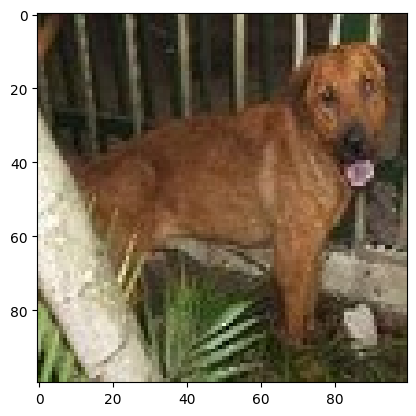

Relevent label value in Y train: [0.]


In [ ]:
# printing the first training pixel into image
plt.imshow(X_train[0, :])
plt.show()
print('Relevent label value in Y train:', Y_train[0])

In [ ]:
# ---- DONT RUN THIS CELL ---- #B

# Traditional way of building the network

# #   Initate the model
# model = Sequential()

# # first convolutional layerv (C-1)
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))  # 32 - no.of.filters, (3, 3) - filter size
# # max pooling layer (MP-1)
# model.add(MaxPooling2D((2, 2)))

# # Second convolutional layerv (C-2)
# model.add(Conv2D(32, (3,3), activation='relu'))  # 32 - no.of.filters, (3, 3) - filter size
# # max pooling layer (MP-2)
# model.add(MaxPooling2D((2, 2)))

# # Flattening Layer
# model.add(Flatten())

# # Fully connected layer
# # First dense layer
# model.add(Dense(70, activation='Relu'))    # 70 no.of.neurons

# # Hidden layer
# model.add(Dense(50, activation='Relu'))    # 50 no.of.neurons

# # final output layer
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Conventional way

model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    # Second convolutional layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # flattening layer
    Flatten(),

    # fully connected layer
    # dense layer
    Dense(70, activation='relu'),
    # hidden layer
    Dense(50, activation='relu'),
    # output layer
    Dense(1, activation='sigmoid')
    ])

In [ ]:
# Model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fiting the data into architecture
model.fit(X_train, Y_train, epochs=15, batch_size=70)

Epoch 1/15
29/29 [==============================] - 6s 29ms/step - loss: 0.7022 - accuracy: 0.5080
Epoch 2/15
29/29 [==============================] - 1s 19ms/step - loss: 0.6811 - accuracy: 0.5400
Epoch 3/15
29/29 [==============================] - 1s 19ms/step - loss: 0.6218 - accuracy: 0.6570
Epoch 4/15
29/29 [==============================] - 1s 20ms/step - loss: 0.5554 - accuracy: 0.7090
Epoch 5/15
29/29 [==============================] - 1s 19ms/step - loss: 0.4770 - accuracy: 0.7810
Epoch 6/15
29/29 [==============================] - 1s 19ms/step - loss: 0.4131 - accuracy: 0.8175
Epoch 7/15
29/29 [==============================] - 1s 19ms/step - loss: 0.3411 - accuracy: 0.8515
Epoch 8/15
29/29 [==============================] - 1s 20ms/step - loss: 0.2759 - accuracy: 0.8855
Epoch 9/15
29/29 [==============================] - 1s 19ms/step - loss: 0.2293 - accuracy: 0.9100
Epoch 10/15
29/29 [==============================] - 1s 20ms/step - loss: 0.2024 - accuracy: 0.9210
Epoch 11/

In [ ]:
# evaluating the model
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 20ms/step - loss: 1.1246 - accuracy: 0.6925


[1.1246389150619507, 0.6924999952316284]

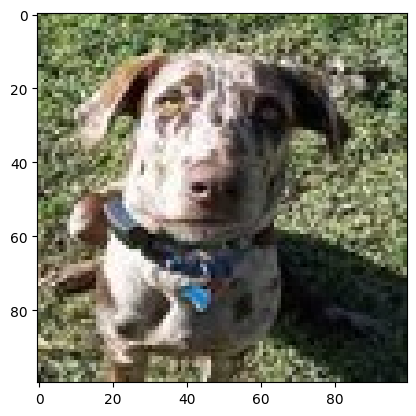

1/1 [==============================] - 0s 18ms/step
[[4.6413156e-06]]
The actual image is: Dog
The model has predicted the image as: Dog


In [ ]:
# predictions
import random
rdm_img = random.randint(0, len(Y_test))
plt.imshow(X_test[rdm_img, :])
plt.show()

# actual condition
if Y_test[rdm_img, :] == 1:
    actual = 'Cat'
else:
    actual = 'Dog'

# predict for the given image
y_pred = model.predict(X_test[rdm_img, :].reshape(1, 100, 100, 3))
print(y_pred)

# prediction condition
if  y_pred >= 0.5:
    pred = 'Cat'
else:
    pred = 'Dog'

print('The actual image is:', actual)
print('The model has predicted the image as:', pred)